In [1]:
pip install ipympl # se tiene que instalar para poder usar las funciones

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [2]:
%matplotlib ipympl
#pip install matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
def plot3d(df1_matched,number,carreras,n_sample=0,index=False,method="PCA"):
    
    """
    Funcion que reduce a 3 la dimension de los embeddings para poder realizar el grafico en 3 dimensiones, busca la
    carrera con el menor numero de datos y usa ese tamaño como numero de datos a usar en el resto de carreras,
    si se ocupa un n_sample entonces busca la cantidad de datos seleccionada en cada carrera

    Inputs:

    df1_matched: Dataframe que contiene los embeddings a graficar
    number: Nombre de la columna en df1_matched que contiene los embeddings
    carreras: Carreras a tomar en cuenta para la creacion del grafico
    n_sample: 0 si se toman todos los datos disponibles, especificar si se quiere una cantidad de datos determinada
    index: True si se desea que los puntos graficados tengan el index de el dataframe como etiqueta
    method: "TSNE" o "PCA"

    Outputs: 

    df_concant: Dataframe que contiene solo las carreras seleccionadas

    """
    #df1_matched_pickle=df2_matched_centroid.copy()
    #df1_matched_pickle.columns=['universidad', 'concepto', 'cuerpo_pre', '0', '1', '2']

    
    df1_matched_pickle=df1_matched.copy()
    if n_sample ==0:
        n_sample=min(df1_matched_pickle[df1_matched_pickle.concepto.isin(carreras)].concepto.value_counts())
    for carrera in carreras:
        if carrera==carreras[0]:
            df_concant=pd.concat([df1_matched_pickle[df1_matched_pickle.concepto==carreras[0]][0:n_sample].copy(),df1_matched_pickle[df1_matched_pickle.concepto==carreras[1]][0:n_sample]].copy())
        elif carrera==carreras[1]:
            continue
        else:
            df_concant=pd.concat([df_concant,df1_matched_pickle[df1_matched_pickle.concepto==carrera][0:n_sample].copy()])

    
    df1_matched_list=df_concant[str(number)].to_list()

    #df1_matched_list=sklearn.preprocessing.minmax_scale(df1_matched_list)
    std_esc=StandardScaler()
    std_fit=std_esc.fit(df1_matched_list)
    df1_matched_list=std_esc.transform(df1_matched_list)

    if method=="TSNE":
        tsne=TSNE(n_components=3,init="pca")
        df3d=pd.DataFrame(tsne.fit_transform(df1_matched_list),columns=list('xyz'))
        print("method: TSNE")
    elif method=="method: PCA":
        pca=PCA(n_components=3)
        df3d=pd.DataFrame(pca.fit_transform(df1_matched_list),columns=list('xyz'))
        print("method: PCA")

    else:
        pca=PCA(n_components=3)
        df3d=pd.DataFrame(pca.fit_transform(df1_matched_list),columns=list('xyz'))
        print("PCA")


    x=df3d['x']
    y=df3d['y']
    z=df3d['z']

    fig = plt.figure(figsize = (10, 5), dpi=100) 
    ax = plt.axes(projection ="3d") 

    marker_n=["x","x","x","x"]
    color_n=["red","blue","green","black"]
    mark_id=0
    qweqwe=0
    for name in df_concant.concepto.unique():
        
        print(name+" - "+color_n[mark_id])
        for i in range(qweqwe,qweqwe+df_concant.concepto.value_counts()[name]):
            ax.scatter3D(x[i], y[i],z[i], color =color_n[mark_id], marker=marker_n[mark_id])
            ax.set_xlabel('EJE_X')
            ax.set_ylabel('EJE_Y')
            ax.set_zlabel('EJE_Z')
        mark_id=mark_id+1
        qweqwe=qweqwe+df_concant.concepto.value_counts()[name]

    #for i in range(200):
    #for i, w in enumerate(df_concant.concepto):
    #    ax.text(x[i],y[i],w[0:3])
    #    #print(w)
    
    if index==True:
        for i, w in enumerate(df_concant.concepto):
            ax.text(x[i],y[i],df_concant.index[i])
            #print(w)
    plt.show()
    return df_concant

    


def plot2d(df1_matched,number,carreras,n_sample,index=False,method="PCA"):


    """
    Funcion que reduce a 2 la dimension de los embeddings para poder realizar el grafico en 3 dimensiones, busca la
    carrera con el menor numero de datos y usa ese tamaño como numero de datos a usar en el resto de carreras,
    si se ocupa un n_sample entonces busca la cantidad de datos seleccionada en cada carrera

    Inputs:

    df1_matched: Dataframe que contiene los embeddings a graficar
    number: Nombre de la columna en df1_matched que contiene los embeddings
    carreras: Carreras a tomar en cuenta para la creacion del grafico
    n_sample: 0 si se toman todos los datos disponibles, especificar si se quiere una cantidad de datos determinada
    index: True si se desea que los puntos graficados tengan el index de el dataframe como etiqueta
    method: "TSNE" o "PCA"

    Outputs: 

    df_concant: Dataframe que contiene solo las carreras seleccionadas

    """
    #df1_matched_pickle=df2_matched_centroid.copy()
    #df1_matched_pickle.columns=['universidad', 'concepto', 'cuerpo_pre', '0', '1', '2']

    df1_matched_pickle=df1_matched.copy()

    if n_sample ==0:
        n_sample=min(df1_matched_pickle[df1_matched_pickle.concepto.isin(carreras)].concepto.value_counts())

    for carrera in carreras:
        if carrera==carreras[0]:
            df_concant=pd.concat([df1_matched_pickle[df1_matched_pickle.concepto==carreras[0]][0:n_sample].copy(),df1_matched_pickle[df1_matched_pickle.concepto==carreras[1]][0:n_sample]].copy())
        elif carrera==carreras[1]:
            continue
        else:
            df_concant=pd.concat([df_concant,df1_matched_pickle[df1_matched_pickle.concepto==carrera][0:n_sample].copy()])

    df1_matched_list=df_concant[str(number)].to_list()

    #df1_matched_list=sklearn.preprocessing.minmax_scale(df1_matched_list)
    std_esc=StandardScaler()
    std_fit=std_esc.fit(df1_matched_list)
    df1_matched_list=std_esc.transform(df1_matched_list)



    if method=="TSNE":
        tsne=TSNE(n_components=2,init="pca")
        df2d=pd.DataFrame(tsne.fit_transform(df1_matched_list),columns=list('xy'))
        print("method: TSNE")
    elif method=="PCA":
        pca=PCA(n_components=2)
        df2d=pd.DataFrame(pca.fit_transform(df1_matched_list),columns=list('xy'))
        print("method: PCA")
    else:
        pca=PCA(n_components=2)
        df2d=pd.DataFrame(pca.fit_transform(df1_matched_list),columns=list('xy'))
        print("method: PCA")



    x=df2d['x']
    y=df2d['y']


    fig = plt.figure(figsize = (10, 5), dpi=100) 
    ax = plt.axes(projection ="rectilinear") 

    marker_n=["x","x","x"]
    color_n=["red","blue","green"]
    mark_id=0
    qweqwe=0
    for name in df_concant.concepto.unique():
        
        print(name+" - "+color_n[mark_id])
        for i in range(qweqwe,qweqwe+df_concant.concepto.value_counts()[name]):
            ax.scatter(x[i], y[i], color =color_n[mark_id], marker=marker_n[mark_id])
            ax.set_xlabel('EJE_X')
            ax.set_ylabel('EJE_Y')
        mark_id=mark_id+1
        qweqwe=qweqwe+df_concant.concepto.value_counts()[name]

    #for i in range(200):
    if index==True:
        for i, w in enumerate(df_concant.concepto):
            ax.text(x[i],y[i],df_concant.index[i])
            #print(w)
    plt.show()
    
    return df_concant

In [4]:
df1_matched_bert = pd.read_pickle("df1_matched.pkl")
df1_matched_gpt2 = pd.read_pickle("df1_matched_gpt2.pkl")

method: TSNE
agronomia - red
psicologia - blue


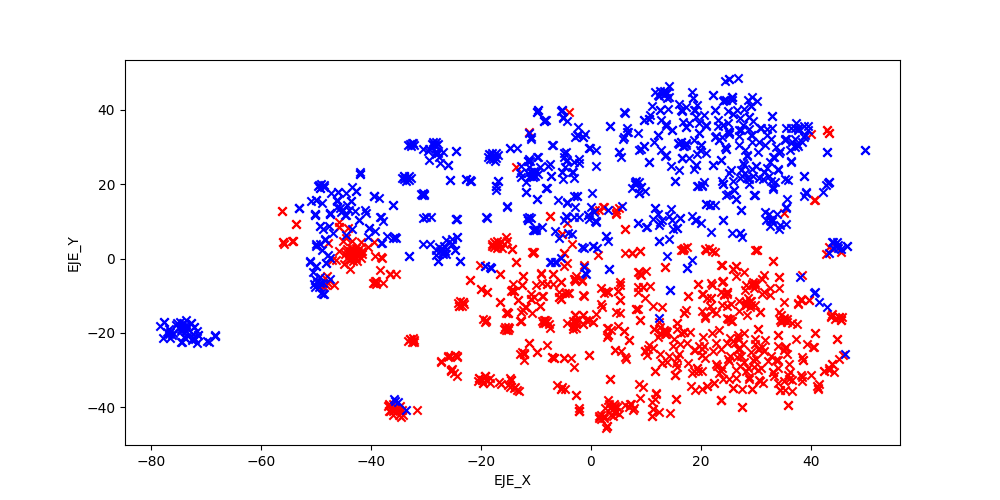

In [5]:
carreras=["agronomia","psicologia"]
df_plot=plot2d(df1_matched_bert,0,carreras,n_sample=0,index=False,method="TSNE")

method: TSNE
agronomia - red
psicologia - blue


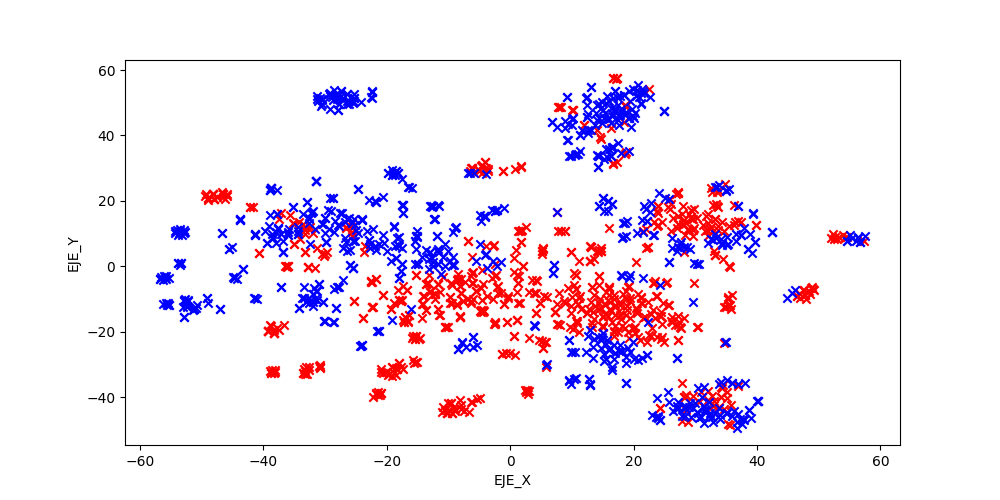

In [6]:
carreras=["agronomia","psicologia"]
df_plot=plot2d(df1_matched_gpt2,0,carreras,n_sample=0,index=False,method="TSNE")

method: TSNE
agronomia - red
psicologia - blue


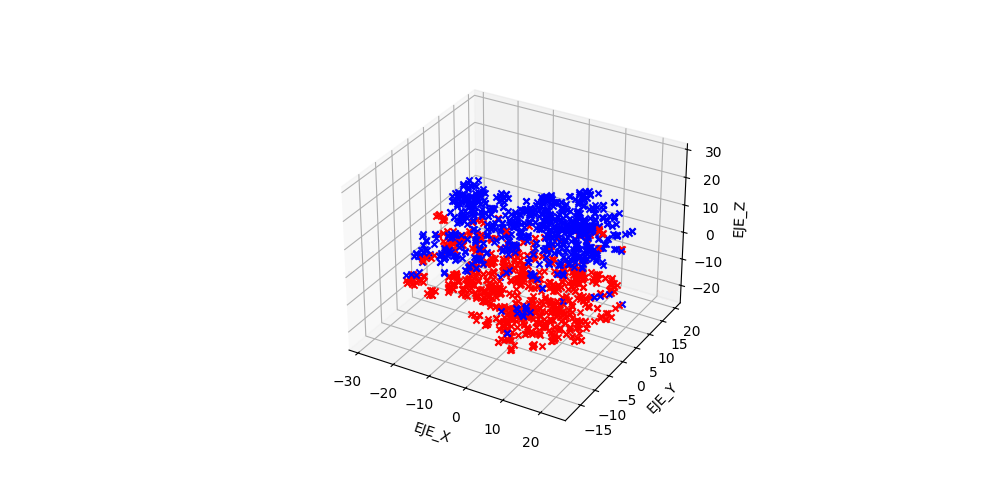

In [7]:
carreras=["agronomia","psicologia"]
df_plot=plot3d(df1_matched_bert,0,carreras,n_sample=0,index=False,method="TSNE")

method: TSNE
agronomia - red
psicologia - blue


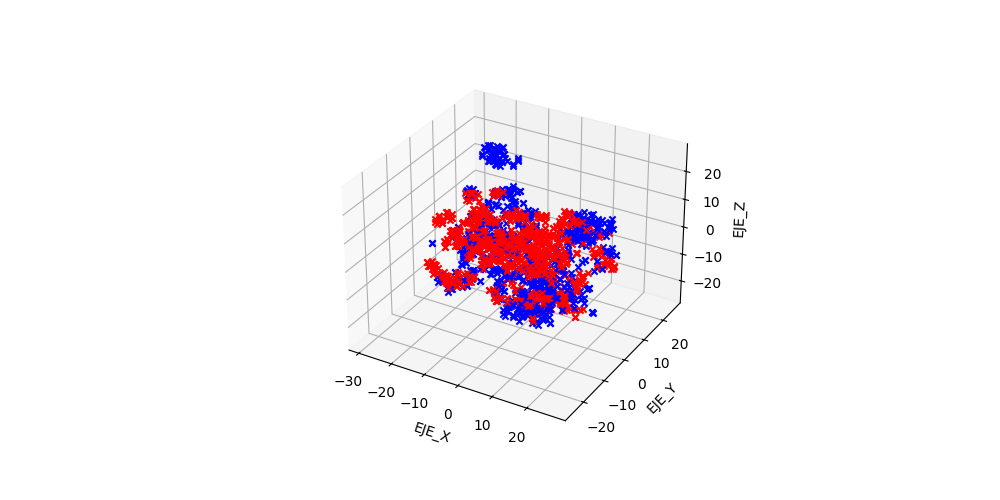

In [8]:
carreras=["agronomia","psicologia"]
df_plot=plot3d(df1_matched_gpt2,0,carreras,n_sample=0,index=False,method="TSNE")